Lets first import required libraries:

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import seaborn as sns
import matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt
import sidetable

matplotlib.rcParams['font.size'] = 18

import seaborn as sns
sns.set_context('talk', font_scale=1.2);

### Load Data From CSV File  

In [3]:
df = pd.read_csv('PovidersUnique.csv')
df.head()

,PID,Fraud,DeductibleAmt,AmtReimbursed,CountOfCID,AvgAmtReimb,AvgAmtDed,CountOfBene,AvgReimbPerBene,AvgDedPerBene,AvgAge
0,PRV51001,No,5340,104640,25,4186,214,24,4360,223,79
1,PRV51003,Yes,66286,605670,132,4588,502,117,5177,567,70
2,PRV51004,No,310,52170,149,350,2,138,378,2,72
3,PRV51005,Yes,3700,280910,1165,241,3,495,567,7,70
4,PRV51007,No,3264,33710,72,468,45,58,581,56,69


In [4]:
605670/132



4588.409090909091

In [5]:
df.dtypes

PID                object
Fraud              object
DeductibleAmt       int64
AmtReimbursed       int64
CountOfCID          int64
AvgAmtReimb         int64
AvgAmtDed           int64
CountOfBene         int64
AvgReimbPerBene     int64
AvgDedPerBene       int64
AvgAge              int64
dtype: object

In [16]:
df.columns

Index(['PID', 'Fraud', 'DeductibleAmt', 'AmtReimbursed', 'CountOfCID',
       'AvgAmtReimb', 'AvgAmtDed', 'CountOfBene', 'AvgReimbPerBene',
       'AvgDedPerBene', 'AvgAge'],
      dtype='object')

In [6]:
df.stb.freq(['Fraud'])[:5]

,Fraud,count,percent,cumulative_count,cumulative_percent
0,No,4904,90.64695,4904,90.64695
1,Yes,506,9.35305,5410,100.00000


In [6]:
#df.stb.freq(['Fraud','InOutPatient'], thresh=.99, other_label="others")

In [10]:
amt.style.format({'In':'${0:,.0f}','Out':'${0:,.0f}'})

,AmtReimbursed
Fraud,
No,260862020
Yes,295681120


<AxesSubplot:xlabel='Fraud'>

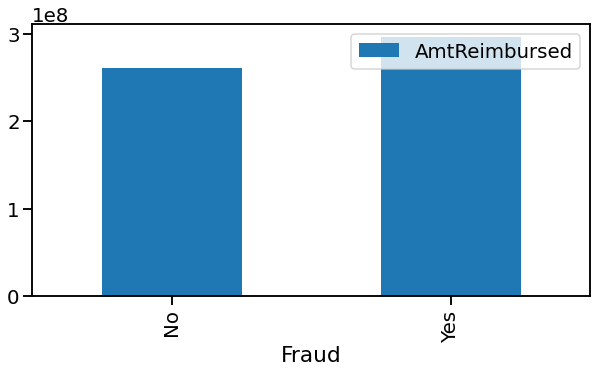

In [12]:
#import matplotlib.backends.qt_editor.formsubplottool

amt= pd.pivot_table(df, index = 'Fraud',  values = 'AmtReimbursed', aggfunc = 'sum')
amt.plot(kind='bar', figsize=(10,5))

In [15]:
cid= pd.pivot_table(df, index = 'Fraud', columns = 'InOutPatient', values = 'Count of CID', aggfunc = 'sum')
cid.plot(kind='bar', figsize=(10,5))

KeyError: 'Count of CID'

In [14]:
ben= pd.pivot_table(df, index = 'Fraud', columns = 'InOutPatient', values = 'CountOfBene', aggfunc = 'sum')
ben.plot(kind='bar', figsize=(10,5))

KeyError: 'InOutPatient'

<h2 id="preprocessing">Data pre-processing and selection</h2>

In [17]:
import plotly.express as px

fig = px.box(df, x="Fraud", y="AmtReimbursed", points='all')
fig.show()

In [18]:
import plotly.express as px

fig = px.box(df, x="Fraud", y="AmtReimbursed")
fig.show()

In [19]:
import plotly.express as px

fig = px.box(df, x="Fraud", y="CountOfCID")
fig.show()

In [20]:
import plotly.express as px

fig = px.box(df, x="Fraud", y="CountOfBene")
fig.show()

In [21]:
import plotly.express as px

fig = px.box(df, x="Fraud", y="AvgAmtReimb")
fig.show()

In [22]:
df['Fraud']=df['Fraud'].apply(lambda x: 1 if x=='Yes' else 0)

Lets select some features for the modeling. Also we change the target data type to be integer, as it is a requirement  by the skitlearn algorithm:

In [23]:
# write your code here
df.describe()

,Fraud,DeductibleAmt,AmtReimbursed,CountOfCID,AvgAmtReimb,AvgAmtDed,CountOfBene,AvgReimbPerBene,AvgDedPerBene,AvgAge
count,5410.000000,5410.000000,5.410000e+03,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000
mean,0.093530,8078.560444,1.028730e+05,103.181331,1740.695379,153.188355,67.153420,1972.164880,168.214048,73.753420
std,0.291201,24924.637743,2.687367e+05,272.456989,3484.469231,300.936682,142.748729,3709.697633,318.157335,4.725778
min,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,34.000000
25%,0.000000,10.000000,4.460000e+03,10.000000,232.250000,0.000000,8.000000,287.000000,0.000000,72.000000
50%,0.000000,310.000000,1.980500e+04,31.000000,356.000000,4.000000,25.000000,543.500000,7.000000,74.000000
75%,0.000000,5340.000000,8.556500e+04,87.000000,1490.000000,137.000000,65.000000,1902.500000,172.000000,76.000000
max,1.000000,539426.000000,5.996050e+06,8240.000000,57000.000000,1068.000000,2857.000000,75000.000000,2136.000000,101.000000


Text(0.5, 0, 'Fraud')

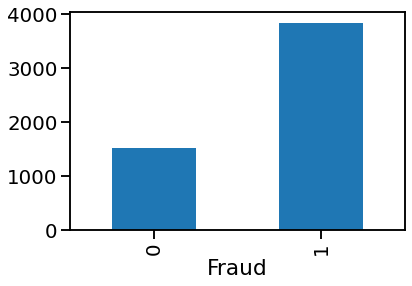

In [24]:
df.groupby('Fraud').AvgAmtReimb.mean().plot(kind='bar').set_xlabel('Fraud')

In [30]:
df.columns

Index(['PID', 'Fraud', 'DeductibleAmt', 'AmtReimbursed', 'CountOfCID',
       'AvgAmtReimb', 'AvgAmtDed', 'CountOfBene', 'AvgReimbPerBene',
       'AvgDedPerBene', 'AvgAge'],
      dtype='object')

In [ ]:
sns.pairplot(df[['Fraud', 'DeductibleAmt', 'AmtReimbursed', 'CountOfCID',
       'AvgAmtReimb', 'AvgAmtDed', 'CountOfBene', 'AvgReimbPerBene',
       'AvgDedPerBene', 'AvgAge']],
             hue= 'Fraud' ,diag_kind= 'kde', plot_kws = {'alpha': 0.6, 's':80, 'edgecolor': 'k'}, size=4);

In [27]:
yonge = df.loc[df.AvgAge < 73]["Fraud"]
rate_yonge = sum(yonge)/len(yonge)

print("% of Yonge who survi:", rate_yonge)


% of Yonge who survi: 0.07043879907621248


In [28]:
out = pd.get_dummies(df['AvgAge'])

df= pd.concat([df,out], axis=1)
df

,PID,Fraud,DeductibleAmt,AmtReimbursed,CountOfCID,AvgAmtReimb,AvgAmtDed,CountOfBene,AvgReimbPerBene,AvgDedPerBene,...,91,92,93,94,95,96,97,98,99,101
0,PRV51001,0,5340,104640,25,4186,214,24,4360,223,...,0,0,0,0,0,0,0,0,0,0
1,PRV51003,1,66286,605670,132,4588,502,117,5177,567,...,0,0,0,0,0,0,0,0,0,0
2,PRV51004,0,310,52170,149,350,2,138,378,2,...,0,0,0,0,0,0,0,0,0,0
3,PRV51005,1,3700,280910,1165,241,3,495,567,7,...,0,0,0,0,0,0,0,0,0,0
4,PRV51007,0,3264,33710,72,468,45,58,581,56,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,PRV57759,0,130,10640,28,380,5,24,443,5,...,0,0,0,0,0,0,0,0,0,0
5406,PRV57760,0,0,4770,22,217,0,9,530,0,...,0,0,0,0,0,0,0,0,0,0
5407,PRV57761,0,370,18470,82,225,5,67,276,6,...,0,0,0,0,0,0,0,0,0,0
5408,PRV57762,0,0,1900,1,1900,0,1,1900,0,...,0,0,0,0,0,0,0,0,0,0


df.fillna(0) Zero
df.dropna(0) 

df.fillna(method ='pad')previous 

df.fillna(method ='bfill')nextone

In [29]:
df[['Fraud', 'DeductibleAmt', 'AmtReimbursed',
       'CountOfCID', 'AvgAmtReimb', 'AvgAmtDed', 'CountOfBene',
       'AvgReimbPerBene', 'AvgDedPerBene', 'AvgAge']].corr()

,Fraud,DeductibleAmt,AmtReimbursed,CountOfCID,AvgAmtReimb,AvgAmtDed,CountOfBene,AvgReimbPerBene,AvgDedPerBene,AvgAge
Fraud,1.000000,0.532070,0.575558,0.374197,0.193802,0.205323,0.393531,0.223881,0.239752,0.001716
DeductibleAmt,0.532070,1.000000,0.961801,0.319308,0.237398,0.295842,0.417258,0.264313,0.331850,0.012651
AmtReimbursed,0.575558,0.961801,1.000000,0.542463,0.205229,0.233973,0.613981,0.236124,0.269787,0.011656
CountOfCID,0.374197,0.319308,0.542463,1.000000,-0.080841,-0.094245,0.942310,-0.056805,-0.078149,0.002431
AvgAmtReimb,0.193802,0.237398,0.205229,-0.080841,1.000000,0.841271,-0.074621,0.984850,0.837690,0.030669
AvgAmtDed,0.205323,0.295842,0.233973,-0.094245,0.841271,1.000000,-0.085396,0.823499,0.992150,0.034160
CountOfBene,0.393531,0.417258,0.613981,0.942310,-0.074621,-0.085396,1.000000,-0.055838,-0.070863,0.006823
AvgReimbPerBene,0.223881,0.264313,0.236124,-0.056805,0.984850,0.823499,-0.055838,1.000000,0.837226,0.029810
AvgDedPerBene,0.239752,0.331850,0.269787,-0.078149,0.837690,0.992150,-0.070863,0.837226,1.000000,0.033845
AvgAge,0.001716,0.012651,0.011656,0.002431,0.030669,0.034160,0.006823,0.029810,0.033845,1.000000


Lets define X, and y for our dataset:

In [30]:
X= np.asarray(df[['DeductibleAmt', 'AmtReimbursed', 'CountOfCID',
       'AvgAmtReimb', 'AvgAmtDed', 'CountOfBene', 'AvgReimbPerBene',
       'AvgDedPerBene']])
y = np.asarray(df['Fraud'])
print(X.shape,y.shape)

(5410, 8) (5410,)


In [31]:
#from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.10, random_state=1)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4869, 8) (4869,)
Test set: (541, 8) (541,)


<h2 id="modeling">Modeling (Scikit-learn)</h2>

Confusion matrix
[[437  57]
 [  7  40]]
Normalized confusion matrix
[[0.88 0.12]
 [0.15 0.85]]


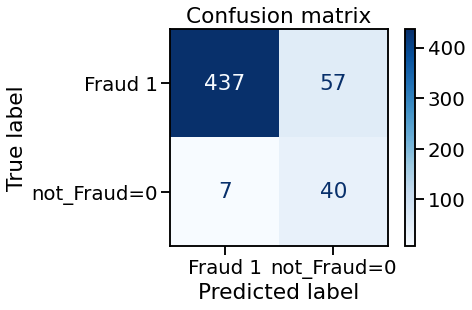

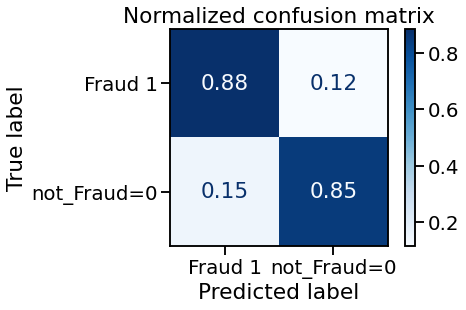

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import class_weight

class_weights = {0:0.08,1:0.92}
# import some data to play with

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
LR = LogisticRegression(C=0.1, solver='liblinear',class_weight=class_weights).fit(X_train,y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(LR, X_test, y_test,
                                 display_labels=['Fraud 1','not_Fraud=0'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


In [34]:
yhat_lr = LR.predict(X_test)

print (classification_report(y_test, yhat_lr))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       494
           1       0.41      0.85      0.56        47

    accuracy                           0.88       541
   macro avg       0.70      0.87      0.74       541
weighted avg       0.93      0.88      0.90       541



Based on the count of each section, we can calculate precision and recall of each label:


- __Precision__ is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

- __Recall__ is true positive rate. It is defined as: Recall =  TP / (TP + FN)

    
So, we can calculate precision and recall of each class.

__F1 score:__
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label. 

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.


And finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.72 in our case.

In [40]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

scoring = {'prec_macro': 'precision_macro',
           'rec_macro': make_scorer(recall_score, average='macro')}

scores = cross_validate(LR, X, y, scoring=scoring,
                         cv=5, return_train_score=True)
sorted(scores.keys())
scores['train_rec_macro']

array([0.85, 0.85, 0.85, 0.85, 0.85])

In [41]:
LR.score(X_test, y_test)


0.8817005545286506

### SVM 


Confusion matrix
[[447  47]
 [  6  41]]
Normalized confusion matrix
[[0.9  0.1 ]
 [0.13 0.87]]


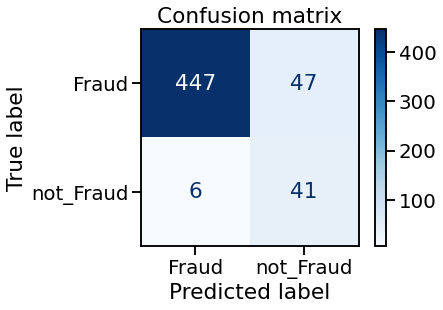

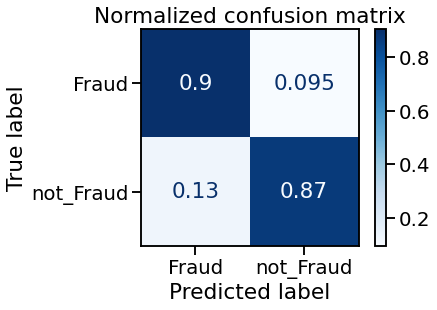

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import plot_confusion_matrix

class_weightss =  {0:0.08,1:0.92}
svm = svm.SVC(kernel='linear', C=0.1, class_weight=class_weightss).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svm, X_test, y_test,
                                 display_labels=['Fraud','not_Fraud'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


In [43]:
yhat_svm = svm.predict(X_test)
print (classification_report(y_test, yhat_svm))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       494
           1       0.47      0.87      0.61        47

    accuracy                           0.90       541
   macro avg       0.73      0.89      0.78       541
weighted avg       0.94      0.90      0.91       541



## Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
# import some data to play with

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1,class_weight=class_weights).fit(X_train,y_train)

np.set_printoptions(precision=2)


In [46]:
yhat_rf = rf.predict(X_test)
print (classification_report(y_test, yhat_rf))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93       494
           1       0.41      0.91      0.57        47

    accuracy                           0.88       541
   macro avg       0.70      0.89      0.75       541
weighted avg       0.94      0.88      0.90       541



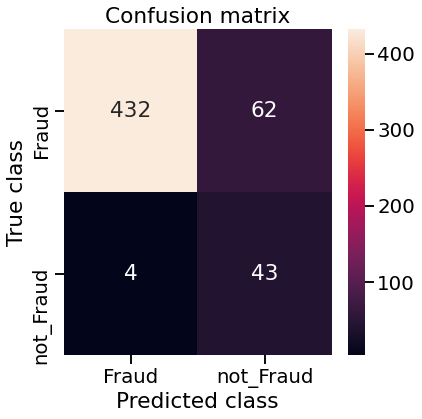

In [47]:
LABELS=['Fraud','not_Fraud']
conf_matrix = confusion_matrix(y_test, yhat_rf)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## XGBoost

In [48]:
import xgboost as xgb
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

In [49]:
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
cv_folds=5
early_stopping_rounds=50
alg = xgb.XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=5,
                        min_child_weight=3, gamma=0.2, subsample=0.6, colsample_bytree=1.0,
                        objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27)


print("Start Feeding Data")
xgb_param = alg.get_xgb_params()
xgtrain = xgb.DMatrix(X_train, label=y_train)
# xgtest = xgb.DMatrix(X_test.values, label=y_test.values)
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                  early_stopping_rounds=early_stopping_rounds)
alg.set_params(n_estimators=cvresult.shape[0])

    
print('Start Training')
alg.fit(X_train, y_train, eval_metric='auc')

Start Feeding Data
Start Training


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=21, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.6, tree_method='exact',
              validate_parameters=1, verbosity=None)

Confusion matrix
[[459  35]
 [ 10  37]]
Normalized confusion matrix
[[459  35]
 [ 10  37]]


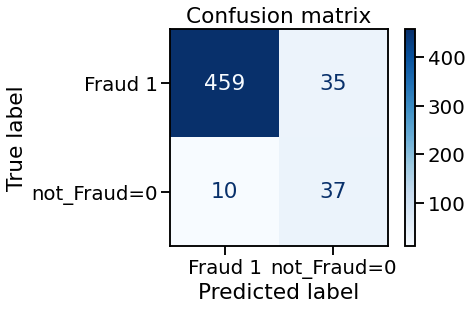

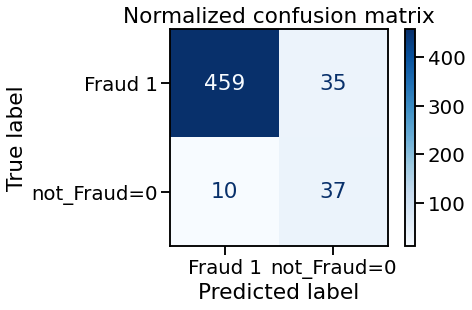

In [50]:


clf = xgb.XGBClassifier(learning_rate=0.01, n_estimators=86, max_depth=5,
                        min_child_weight=3, gamma=0.2, subsample=0.6, colsample_bytree=1.0,
                        objective='binary:logistic', nthread=4, scale_pos_weight=6, seed=27)


xgbb = clf.fit(X_train,y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix",  None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(xgbb, X_test, y_test,
                                 display_labels=['Fraud 1','not_Fraud=0'],
                                 cmap=plt.cm.Blues,
                                 )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


In [52]:
LABELS=['Fraud','not_Fraud']
conf_matrix = confusion_matrix(y_test, yhat_xgb)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

NameError: name 'yhat_xgb' is not defined

In [53]:
yhat_xgb = xgbb.predict(X_test)
print (classification_report(y_test, yhat_xgb))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       494
           1       0.51      0.79      0.62        47

    accuracy                           0.92       541
   macro avg       0.75      0.86      0.79       541
weighted avg       0.94      0.92      0.92       541



In [46]:
from sklearn import metrics
print("LR Accuracy             : ", np.round(metrics.accuracy_score(y_test,  yhat_lr),2))
print("SVM Accuracy            : ", np.round(metrics.accuracy_score(y_test,  yhat_svm),2))
print("Random Forest  Accuracy : ", np.round(metrics.accuracy_score(y_test,  yhat_rf),2))
print("XGB            Accuracy : ", np.round(metrics.accuracy_score(y_test,  yhat_xgb),2))

LR Accuracy             :  0.88
SVM Accuracy            :  0.9
Random Forest  Accuracy :  0.88
XGB            Accuracy :  0.92


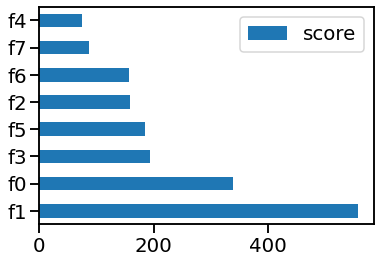

In [47]:
feature_important = xgbb.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh')


In [48]:
sorted_idx = np.argsort(xgbb.feature_importances_)[::-1]
sorted_idx

array([1, 6, 3, 5, 7, 2, 4, 0], dtype=int64)

In [49]:
feature=['DeductibleAmt', 'AmtReimbursed', 'CountOfCID',
       'AvgAmtReimb', 'AvgAmtDed', 'CountOfBene', 'AvgReimbPerBene',
       'AvgDedPerBene', 'AvgAge']

In [50]:
for index in sorted_idx:
    print(feature[index], xgbb.feature_importances_[index])

AmtReimbursed 0.6838422
AvgReimbPerBene 0.056488708
AvgAmtReimb 0.04833007
CountOfBene 0.04700127
AvgDedPerBene 0.04626358
CountOfCID 0.042688664
AvgAmtDed 0.038836647
DeductibleAmt 0.036548927


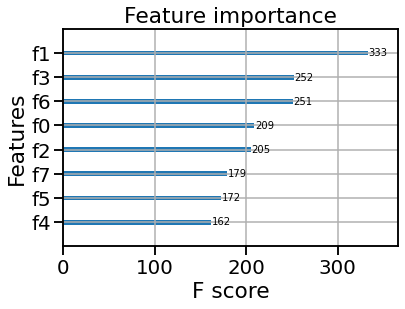

In [154]:
xgb.plot_importance(xgbb, max_num_features = 15)
plt.show()

In [148]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['AmtReimbursed'], df['Fraud'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5755575683279844  with a P-value of P = 0.0


In [149]:
pearson_coef, p_value = stats.pearsonr(df['DeductibleAmt'], df['Fraud'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5320696120060662  with a P-value of P = 0.0


In [150]:
df.corr()

,Fraud,DeductibleAmt,AmtReimbursed,CountOfCID,AvgAmtReimb,AvgAmtDed,CountOfBene,AvgReimbPerBene,AvgDedPerBene,AvgAge
Fraud,1.000000,0.532070,0.575558,0.374197,0.193802,0.205323,0.393531,0.223881,0.239752,0.001716
DeductibleAmt,0.532070,1.000000,0.961801,0.319308,0.237398,0.295842,0.417258,0.264313,0.331850,0.012651
AmtReimbursed,0.575558,0.961801,1.000000,0.542463,0.205229,0.233973,0.613981,0.236124,0.269787,0.011656
CountOfCID,0.374197,0.319308,0.542463,1.000000,-0.080841,-0.094245,0.942310,-0.056805,-0.078149,0.002431
AvgAmtReimb,0.193802,0.237398,0.205229,-0.080841,1.000000,0.841271,-0.074621,0.984850,0.837690,0.030669
AvgAmtDed,0.205323,0.295842,0.233973,-0.094245,0.841271,1.000000,-0.085396,0.823499,0.992150,0.034160
CountOfBene,0.393531,0.417258,0.613981,0.942310,-0.074621,-0.085396,1.000000,-0.055838,-0.070863,0.006823
AvgReimbPerBene,0.223881,0.264313,0.236124,-0.056805,0.984850,0.823499,-0.055838,1.000000,0.837226,0.029810
AvgDedPerBene,0.239752,0.331850,0.269787,-0.078149,0.837690,0.992150,-0.070863,0.837226,1.000000,0.033845
AvgAge,0.001716,0.012651,0.011656,0.002431,0.030669,0.034160,0.006823,0.029810,0.033845,1.000000
